In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import requests

from operator import itemgetter
from pandas.io.json import json_normalize
from scipy import special, optimize

In [6]:
# openFDA API key: TTwz56GNTpZnsL4il0pLIwz7F43QObZOQEssWlSU

def get_drug_adverse_event_data(drugname):
    
    request_string='https://api.fda.gov/drug/event.json?api_key=TTwz56GNTpZnsL4il0pLIwz7F43QObZOQEssWlSU&search=patient.drug.medicinalproduct:'+drugname+'&count=patient.reaction.reactionmeddrapt.exact'
    
    json_df = requests.get(request_string).json()
    
    json_list = json_df['results']
    
    print drugname
    for x in range(0, min(15, len(json_list))):
    	entry = json_list[x]
    	print 'term: ' + str(entry['term']) + " count " + str(entry['count'])
        
    # return the results
    return json_df['results']
    
def get_event_count(event_list, event):
    try:
        index=map(itemgetter('term'), event_list).index(event)
        return event_list[index].get('count')
    except ValueError:
        return 0


In [7]:
drugname1='tylenol'
drugname2='ibuprofen'

druglist1=get_drug_adverse_event_data(drugname1)
druglist2=get_drug_adverse_event_data(drugname2)

event1='NAUSEA'
event2='ANXIETY'

tylenol_list=[get_event_count(druglist1, event1), get_event_count(druglist1, event2)]
ibuprofen_list=[get_event_count(druglist2, event1), get_event_count(druglist2, event2)]

print "tylenol list: Nausea, Anxiety" 
print tylenol_list
print "ibuprofen list: Nausea, Anxiety"
print ibuprofen_list


tylenol
term: NAUSEA count 5037
term: FATIGUE count 4162
term: HEADACHE count 4092
term: PAIN count 3880
term: DRUG INEFFECTIVE count 3858
term: DYSPNOEA count 3781
term: DIARRHOEA count 3635
term: VOMITING count 3521
term: DIZZINESS count 3028
term: ASTHENIA count 2709
term: PYREXIA count 2689
term: ARTHRALGIA count 2437
term: PAIN IN EXTREMITY count 2178
term: FALL count 2161
term: BACK PAIN count 2030
ibuprofen
term: PAIN count 4513
term: NAUSEA count 3764
term: DRUG INEFFECTIVE count 3146
term: HEADACHE count 3077
term: FATIGUE count 2849
term: DYSPNOEA count 2811
term: VOMITING count 2775
term: ANXIETY count 2469
term: DIZZINESS count 2439
term: DIARRHOEA count 2147
term: ARTHRALGIA count 1910
term: PAIN IN EXTREMITY count 1893
term: INJURY count 1864
term: DEPRESSION count 1864
term: PYREXIA count 1851
tylenol list: Nausea, Anxiety
[5037, 2017]
ibuprofen list: Nausea, Anxiety
[3764, 2469]


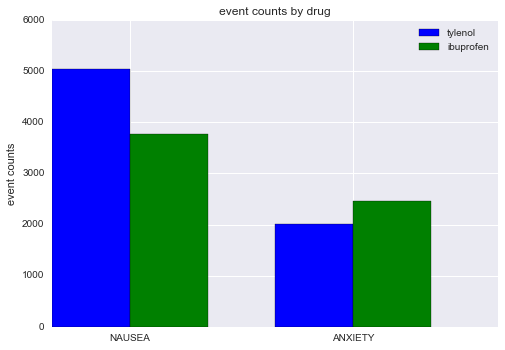

In [8]:
color1='blue'
color2='green'

ind=np.asarray([1,2])
width = 0.35 
fig, ax = plt.subplots()

rects1 = plt.bar(ind, tylenol_list, width, color=color1)
rects2 = plt.bar(ind+width, ibuprofen_list, width, color=color2)

ax.set_ylabel('event counts')
ax.set_title('event counts by drug')

ax.set_xticks(ind+width)
ax.set_xticklabels( (event1, event2) )

ax.legend( (rects1[0], rects2[0]), (drugname1, drugname2) )

plt.show()
# plt.savefig('fdaOpen_incubator_fig_01.png')


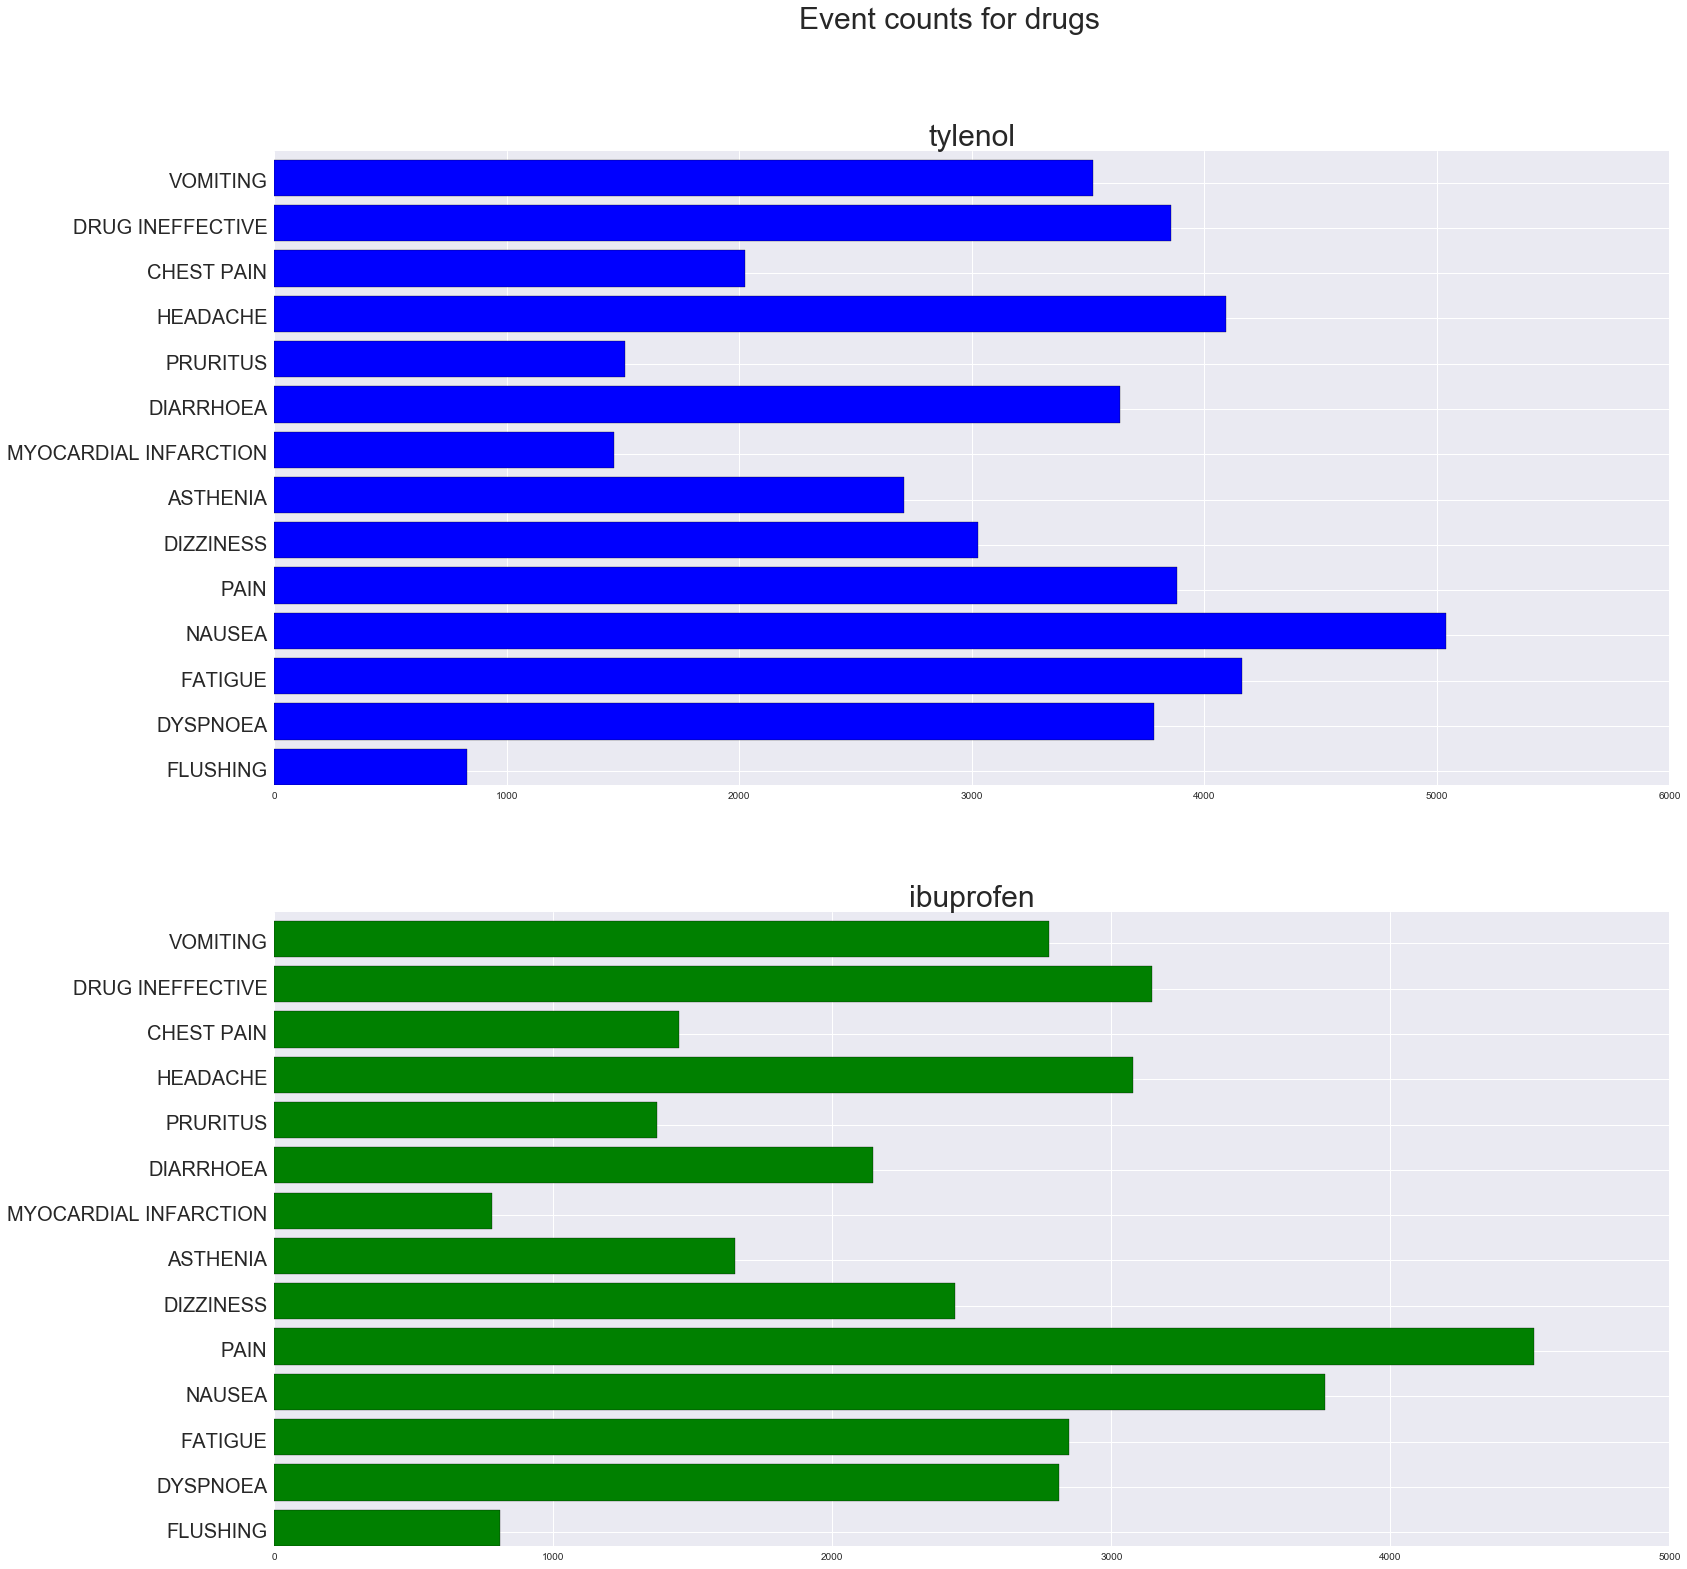

In [9]:
events=['FLUSHING', 'DYSPNOEA', 'FATIGUE', 'NAUSEA', 'PAIN', 'DIZZINESS', 'ASTHENIA', 'MYOCARDIAL INFARCTION', 'DIARRHOEA', 'PRURITUS', 'HEADACHE', 'CHEST PAIN', 'DRUG INEFFECTIVE', 'VOMITING']

#DYSPNOEA, DIZZINESS, FATIGUE, ASTHENIA, MYOCARDIAL INFARCTION, DIARRHOEA, PRURITUS, HEADACHE, CHEST PAIN, DRUG INEFFECTIVE, VOMITING, PAIN, FALL

count1=[]
count2=[]

for event in events:
    count1.append(get_event_count(druglist1, event))
    count2.append(get_event_count(druglist2, event))
    
ind=np.arange(len(count1))
                  
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(25,25))

axes[0].barh(ind, count1, color=color1)
axes[0].set_yticks(ind+.3)
axes[0].set_yticklabels(events, fontsize=20)
axes[0].set_title(drugname1, fontsize=30)

axes[1].barh(ind, count2, color=color2)
axes[1].set_yticks(ind+.3)
axes[1].set_yticklabels(events, fontsize=20)
axes[1].set_title(drugname2, fontsize=30)

plt.suptitle('Event counts for drugs', fontsize=30)

plt.show()
# plt.savefig('fdaOpen_incubator_fig_02.png')


paxil
term: DRUG WITHDRAWAL SYNDROME count 5323
term: DRUG EXPOSURE DURING PREGNANCY count 3351
term: DIZZINESS count 3293
term: NAUSEA count 3289
term: DRUG INEFFECTIVE count 3000
term: ANXIETY count 2995
term: DEPRESSION count 2435
term: HEADACHE count 2360
term: FATIGUE count 2298
term: INSOMNIA count 2142
term: WEIGHT INCREASED count 1839
term: FOETAL EXPOSURE DURING PREGNANCY count 1765
term: SUICIDAL IDEATION count 1736
term: PARAESTHESIA count 1647
term: TREMOR count 1604
lexapro
term: NAUSEA count 2843
term: FATIGUE count 2361
term: DEPRESSION count 2214
term: ANXIETY count 2113
term: DRUG INEFFECTIVE count 2000
term: PAIN count 1959
term: HEADACHE count 1882
term: DIZZINESS count 1804
term: DIARRHOEA count 1660
term: DYSPNOEA count 1544
term: VOMITING count 1523
term: INSOMNIA count 1413
term: FALL count 1315
term: ASTHENIA count 1290
term: WEIGHT INCREASED count 1171
hydrocodone
term: COMPLETED SUICIDE count 4979
term: PAIN count 3823
term: NAUSEA count 3553
term: DRUG INEFFE

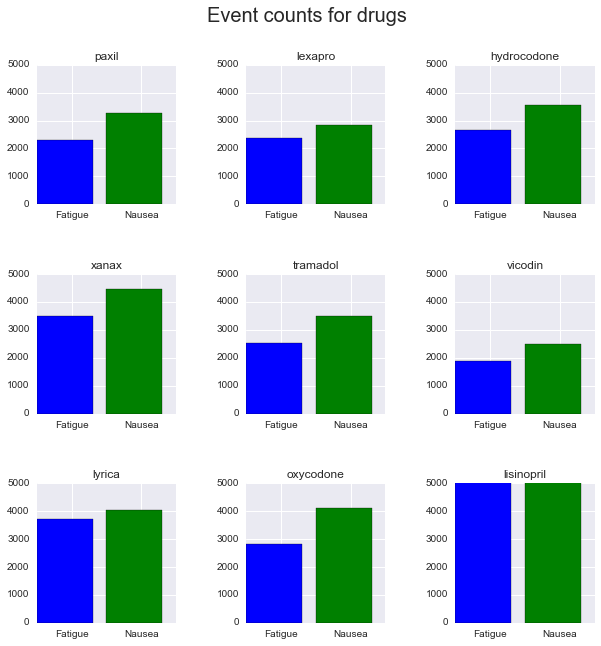

In [10]:
# This example shows a table with embedded charts to compare many drugs for 2 side effects

event1='FATIGUE'
event2='NAUSEA'

ind=np.asarray([1,2])

drugs=['paxil', 'lexapro', 'hydrocodone', 'xanax', 'tramadol', 'vicodin', 'lyrica', 'oxycodone', 'lisinopril']

plotpos=[331, 332, 333, 334, 335, 336, 337, 338, 339]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(25,25))

for drug, pos in zip(drugs,plotpos):
    druglist=get_drug_adverse_event_data(drug)
    counts=[get_event_count(druglist, event1), get_event_count(druglist, event2)]
    plt.subplot(pos)
    plt.bar(ind, counts, color=[color1, color2])
    ax=plt.gca()
    ax.set_xticks(ind+.5)
    ax.set_xticklabels(['Fatigue','Nausea'])
    ax.set_title(drug)
    plt.ylim([0,5000])
    
    
fig.set_size_inches(10,10)    
plt.subplots_adjust(wspace=.5,hspace=.5)
plt.suptitle('Event counts for drugs', fontsize=20)
plt.show()

paxil
term: DRUG WITHDRAWAL SYNDROME count 5323
term: DRUG EXPOSURE DURING PREGNANCY count 3351
term: DIZZINESS count 3293
term: NAUSEA count 3289
term: DRUG INEFFECTIVE count 3000
term: ANXIETY count 2995
term: DEPRESSION count 2435
term: HEADACHE count 2360
term: FATIGUE count 2298
term: INSOMNIA count 2142
term: WEIGHT INCREASED count 1839
term: FOETAL EXPOSURE DURING PREGNANCY count 1765
term: SUICIDAL IDEATION count 1736
term: PARAESTHESIA count 1647
term: TREMOR count 1604
lexapro
term: NAUSEA count 2843
term: FATIGUE count 2361
term: DEPRESSION count 2214
term: ANXIETY count 2113
term: DRUG INEFFECTIVE count 2000
term: PAIN count 1959
term: HEADACHE count 1882
term: DIZZINESS count 1804
term: DIARRHOEA count 1660
term: DYSPNOEA count 1544
term: VOMITING count 1523
term: INSOMNIA count 1413
term: FALL count 1315
term: ASTHENIA count 1290
term: WEIGHT INCREASED count 1171
hydrocodone
term: COMPLETED SUICIDE count 4979
term: PAIN count 3823
term: NAUSEA count 3553
term: DRUG INEFFE

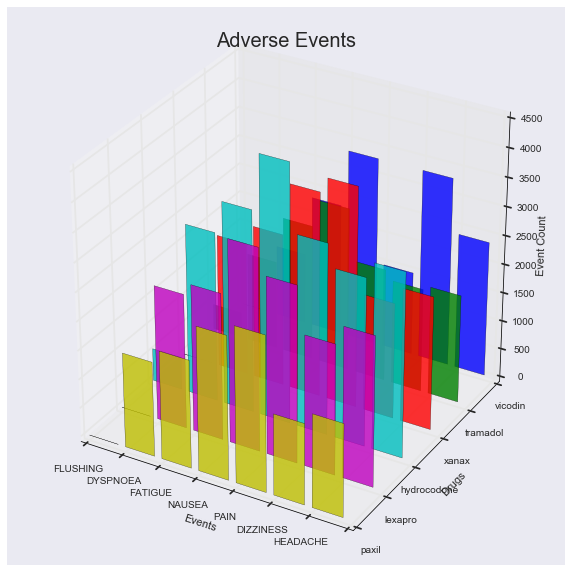

In [11]:
'''
For many drugs and many events we can use a 3D bar plot based on 
http://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html#bar-plots
Matplotlib has a 3d plotting extension 'mplot3d', which supports many type of 3D plots
'''
from mpl_toolkits.mplot3d import Axes3D

colors=['b','g','r', 'c', 'm', 'y']
drugs=['paxil', 'lexapro', 'hydrocodone', 'xanax', 'tramadol', 'vicodin']
events=['FLUSHING', 'DYSPNOEA', 'FATIGUE', 'NAUSEA', 'PAIN', 'DIZZINESS', 'HEADACHE']
positions=[50,40,30,20,10,0]
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
for c, drug, z in zip(colors, drugs, positions):
    xs = np.arange(len(events))
    ys = []
    druglist=get_drug_adverse_event_data(drug)
    
    for event in events:
        ys.append(get_event_count(druglist, event))

    ax.bar(xs, ys, zs=z, zdir='y', color=c, alpha=0.8)

ax.set_xticklabels(events)
ax.set_yticklabels(drugs)
ax.set_xlabel('Events')
ax.set_ylabel('Drugs')
ax.set_zlabel('Event Count')

plt.title('Adverse Events', fontsize=20)
plt.show()

paxil
term: DRUG WITHDRAWAL SYNDROME count 5323
term: DRUG EXPOSURE DURING PREGNANCY count 3351
term: DIZZINESS count 3293
term: NAUSEA count 3289
term: DRUG INEFFECTIVE count 3000
term: ANXIETY count 2995
term: DEPRESSION count 2435
term: HEADACHE count 2360
term: FATIGUE count 2298
term: INSOMNIA count 2142
term: WEIGHT INCREASED count 1839
term: FOETAL EXPOSURE DURING PREGNANCY count 1765
term: SUICIDAL IDEATION count 1736
term: PARAESTHESIA count 1647
term: TREMOR count 1604
lexapro
term: NAUSEA count 2843
term: FATIGUE count 2361
term: DEPRESSION count 2214
term: ANXIETY count 2113
term: DRUG INEFFECTIVE count 2000
term: PAIN count 1959
term: HEADACHE count 1882
term: DIZZINESS count 1804
term: DIARRHOEA count 1660
term: DYSPNOEA count 1544
term: VOMITING count 1523
term: INSOMNIA count 1413
term: FALL count 1315
term: ASTHENIA count 1290
term: WEIGHT INCREASED count 1171
hydrocodone
term: COMPLETED SUICIDE count 4979
term: PAIN count 3823
term: NAUSEA count 3553
term: DRUG INEFFE

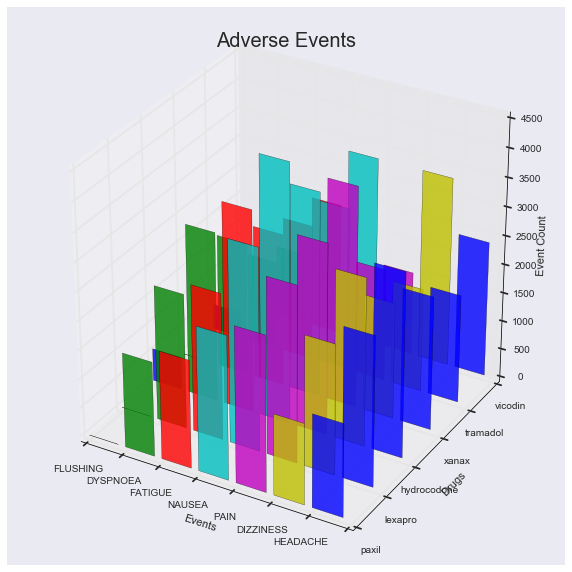

In [12]:
'''
It might also be useful to assign each symptom a unique color (instead of each drug). 
This can be done by passing in the entire array of colors each time we call bar. 
Note that in both cases the code is almost the same. 
It would be good practice to write this as a function and pass in a variable that defines the colored axis).
'''
from mpl_toolkits.mplot3d import Axes3D

colors=['b','g','r', 'c', 'm', 'y']
drugs=['paxil', 'lexapro', 'hydrocodone', 'xanax', 'tramadol', 'vicodin']
events=['FLUSHING', 'DYSPNOEA', 'FATIGUE', 'NAUSEA', 'PAIN', 'DIZZINESS', 'HEADACHE']
positions=[50,40,30,20,10,0]
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
for c, drug, z in zip(colors, drugs, positions):
    xs = np.arange(len(events))
    ys = []
    druglist=get_drug_adverse_event_data(drug)
    
    for event in events:
        ys.append(get_event_count(druglist, event))

    ax.bar(xs, ys, zs=z, zdir='y', color=colors, alpha=0.8)

ax.set_xticklabels(events)
ax.set_yticklabels(drugs)
ax.set_xlabel('Events')
ax.set_ylabel('Drugs')
ax.set_zlabel('Event Count')

plt.title('Adverse Events', fontsize=20)
plt.show()